# Twitter Sentiment Analysis
**Detect hate speech (racist/sexist) in tweets.**

# Project Submitted By : Mow Mukherjee

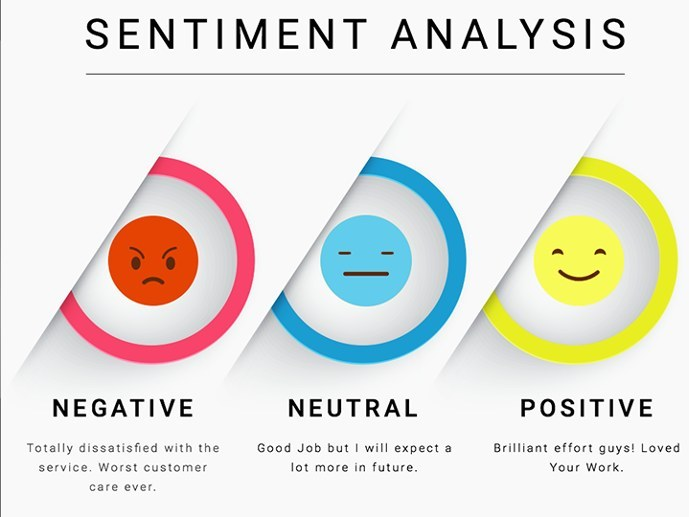

# Project's Brief Details: <br>
**Hate Speech in the form of racism and sexism has become a nuisance on twitter and it is important to segregate these sort of tweets from the rest.** <br>
**In this problem, we provide Twitter data that has both normal and hate tweets.** <br>
**Your task is to identify the tweets which have a positive connotation from the tweets that have a negative one**.

# What is Sentimental Analysis..?? <br>

**A good sentiment analysis tool will tell you whether content that someone has shared online (like a Tweet, post, or comment, etc) expresses positive, negative, or neutral opinions.** <br>
**This is done using algorithms that perform text analyses, computational linguistics, and natural language processing to understand the sentiment attached to an author’s words.** <br>

**Analyzing patterns in sentiment from customer feedback allows you to identify what your customers like (and dislike).** <br>
**And this is key to creating an amazing user experience.**<br>

  **1. Topic.** <br>
**2. Presenter Detail.** <br>
**3. Project Detail.** <br>
**4. Importing All Important Libraries.** <br>
**5. Loading the Data.** <br>
**6. Exploratory Data Analysis.** <br>
**7. Data Visualisation.** <br>
**8. Data Cleaning.** <br>
**9. Sentiment Analysis.** <br>
**10. Normal Tweets.** <br>
**11. Racist / Sexist Tweets.** <br>
**12 Visualization of common words tweets.** <br>
**13.Train_Test_Split.** <br>
**14. Count Vectorizer.** <br>
**15. Random Forest Classifier.** <br>
**16. Decision Tree Classifier.** <br>
**17. Hashtags.** <br>
**18. XGB Classifier.** <br>
**19. Support Vector Classifier.** <br>
**20. Comparision Random Forest VS XGBoost Vs SVC.** <br>
**21. Applying Bag of Words.** <br>
**22. Positive, Neutral And Negative Sentiment.** <br>
**23 Visualization of common words tweets.** <br>
**24. Normal Tweets.** <br>
**25. Racist/Sexist Tweets.** <br>
**26 CountVectorizer.** <br>
**27. Naive Bayes.** <br>
**28. Logistic Regression.** <br>
**29. Tfidf.** <br>
**30. min_df & n-grams.** <br>
**31. Hyper parameter tuning.** <br>
**32. Towards Conclusion.** <br>
**33. Conclusion.**  <br>

# Importing All Important Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

import warnings 
warnings.filterwarnings("ignore")

# Loading the Data Set

In [ ]:
train  = pd.read_csv("../input/tweeter-hate-speech-sentiment-analysis/train_tweets.csv")
test = pd.read_csv("../input/tweeter-hate-speech-sentiment-analysis/test_tweets.csv")

# Exploratory Data Analysis

In [ ]:
train.shape


In [ ]:
test.shape


In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train['tweet'].isna().sum()

In [ ]:
train['label'].value_counts() #count number of  positive and negative  tweet

In [ ]:
train['length'] = train['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

In [ ]:
# Count positive negative label
fig2 = sns.countplot(x= 'label',data = train)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [ ]:
#count of words disrtibution
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
train['length'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [ ]:
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table.tweet)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [ ]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

# Data Visualisation

In [ ]:
word_frequency = vectorization(train).sort_values(0, ascending = False)
#word_frequency_pos = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)
#word_frequency_neg = vectorization(training_data[training_data['label'] == '1']).sort_values(0, ascending = False)

    #Graph with frequency words all, positive and negative tweets and get the frequency
graph(word_frequency, 'all')
#graph(word_frequency_pos, 'positive')
#graph(word_frequency_neg, 'negative')

In [ ]:
word_frequency_pos = vectorization(train[train['label'] == 0]).sort_values(0, ascending = False)
word_frequency_neg = vectorization(train[train['label'] == 1]).sort_values(0, ascending = False)

graph(word_frequency_pos, 'positive')
graph(word_frequency_neg, 'negative')

In [ ]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

In [ ]:
table_regression = pd.concat([word_frequency_pos, word_frequency_neg], axis=1, sort=False)
table_regression.columns = ["Positive", "Negative"]
regression_graph(table_regression)

In [ ]:
#function to drop unwanted features

def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [ ]:
train.shape, test.shape

# Data Cleaning

In [ ]:
train.drop('id',inplace = True, axis = 1)
train

In [ ]:
test.drop('id',inplace = True, axis = 1)
test

# Sentiment Analysis

In [ ]:
from textblob import TextBlob
def getSubjectivity(tweet) :
    return TextBlob(tweet).sentiment.subjectivity
def getPolarity(tweet) :
    return TextBlob(tweet).sentiment.polarity
def getAnalysis(score) :
    return 'Neutral' if (score == 0) else ('Negative' if (score < 0) else 'Positive')

In [ ]:
train['Subjectivity'] = train['tweet'].apply(getSubjectivity)
train['Polarity'] = train['tweet'].apply(getPolarity)
train['Analysis'] = train['Polarity'].apply(getAnalysis)

train

In [ ]:
import re
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [ ]:
train['processed_tweets'] = train['tweet'].apply(process_tweet)

In [ ]:
train.head(5)

# Normal Tweets

In [ ]:
normal_words = ' '.join([word for word in train['processed_tweets'][train['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Racist/Sexist Tweets

In [ ]:
negative_words = ' '.join([word for word in train['processed_tweets'][train['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
train.info()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train["processed_tweets"], train["label"], test_size = 0.2, random_state = 42)

# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [ ]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [ ]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

In [ ]:
x_train_counts

In [ ]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [ ]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

In [ ]:
predictions = model.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

In [ ]:
rf_f1=f1_score(y_test,predictions)
rf_f1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train["tweet"], train["label"], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(sublinear_tf=True)

X_train_cnt = count_vect.fit_transform(X_train)
X_train_TF = transformer.fit_transform(X_train_cnt)
print(X_train_cnt.shape)
print(X_train_TF.shape)

X_test_cnt = count_vect.transform(X_test)
X_test_TF = transformer.transform(X_test_cnt)
print(X_test_cnt.shape)
print(X_test_TF.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFClass
ranForModel = RFClass(n_estimators=10, criterion = "entropy")
ranForModel.fit(X_train_TF, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report as class_re
from sklearn.metrics import confusion_matrix as c_m
ranForPredict = ranForModel.predict(X_test_TF)
print("Predicted Class:",ranForPredict)
print("Confusion Matrix:\n",c_m(Y_test ,ranForPredict))
print("Accuracy:", accuracy_score(Y_test ,ranForPredict))
print("F_score:", f1_score(Y_test ,ranForPredict))
print("Classification Report:\n",class_re(Y_test ,ranForPredict))

In [ ]:
from wordcloud import WordCloud as WC
WordsInAllTweets = ''.join([words for words in train['tweet']])
wordcloud = WC(width = 1000, height = 600, random_state = 42, max_font_size = 120).generate(WordsInAllTweets)


pos_train = train[train['Analysis'] == "Positive"]
WordsInPosTweets = ''.join([words for words in pos_train['tweet']])
pos_wordcloud = WC(width = 1000, height = 600, random_state = 42, max_font_size = 120).generate(WordsInPosTweets)

neg_train = train[train['Analysis'] == "Negative"]
WordsInNegTweets = ''.join([words for words in neg_train['tweet']])
neg_wordcloud = WC(width = 1000, height = 600, random_state = 42, max_font_size = 120).generate(WordsInNegTweets)

neu_train = train[train['Analysis'] == "Neutral"]
WordsInNeuTweets = ''.join([words for words in neu_train['tweet']])
neu_wordcloud = WC(width = 1000, height = 600, random_state = 42, max_font_size = 120).generate(WordsInNeuTweets)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import classification_report as class_re
from sklearn.preprocessing import StandardScaler

train.drop('tweet',inplace = True, axis = 1)
train.Analysis = train.Analysis.map({"Neutral":0, "Negative":-1, "Positive":+1})
col_names = ["Subjectivity", "Polarity", "Analysis"]
target_name = ["label"]


X = train[col_names]
X_std_scal = StandardScaler().fit_transform(X)
Y = train[target_name]

X_train, X_test, Y_train, Y_test = train_test_split(X_std_scal, Y, test_size = 0.20, random_state = 42)

DTreeClass = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth = 7)
DTreeClass.fit(X_train, Y_train)
Y_pred = DTreeClass.predict(X_test)
Y_scored = DTreeClass.score(X,Y)
Y_scored2 = DTreeClass.score(X_train,Y_train)
Y_scored3 = DTreeClass.score(X_test,Y_test)


print("Classification Report:\n",class_re(Y_test, Y_pred))
print("Confusion Matrix:\n",c_m(Y_test ,Y_pred))
print("F_score:", f1_score(Y_test ,Y_pred))
print("Accuracy:", acc_score(Y_test, Y_pred))
print("Predicted Class:",Y_pred)
print("Scored Class (From all data):",Y_scored)
print("Scored Class (From training data):",Y_scored2)
print("Scored Class (From testing data):",Y_scored3)


# Hashtags

In [ ]:
import pandas_profiling
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
model_bow.fit(x_train_tfidf,y_train)

In [ ]:
predict_xgb = model_bow.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predict_xgb)

In [ ]:
xgb_f1=f1_score(y_test,predict_xgb)
xgb_f1

# Support Vector Classifier

In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf,y_train)

In [ ]:
predict_svm = lin_clf.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predict_svm)

In [ ]:
svm_f1=f1_score(y_test,predict_svm)
svm_f1

# Comparision Random Forest VS XGBoost Vs SVM

In [ ]:
results = {'RandomForest':rf_f1, 'XgBoost':xgb_f1,'SVM':svm_f1}  
df = pd.DataFrame(results, index =['f1Score']) 
df

# Applying Bag-of-Words

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train['processed_tweets'], train['label'], random_state = 0)
X_train.shape, X_val.shape

In [ ]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)
reformed

In [ ]:
train  = pd.read_csv("../input/tweeter-hate-speech-sentiment-analysis/train_tweets.csv")
test = pd.read_csv("../input/tweeter-hate-speech-sentiment-analysis/test_tweets.csv")

In [ ]:
df = train.append(test, ignore_index = True)
df.shape

In [ ]:
df.sample(5)

In [ ]:
#Code to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
df.head()

In [ ]:
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
df.head()


In [ ]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
df.head(5)

In [ ]:
#Removing the word 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))
df.head()

In [ ]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)
reformed

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))
df.head(5)

In [ ]:
#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df.head()


In [ ]:
train['cleaned_tweet'] = train.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))
test['cleaned_tweet'] = test.tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [ ]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

In [ ]:
#Select top 20 most frequent hashtags and plot them   
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in train['cleaned_tweet'][train['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

In [ ]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_frequent, x= "Hashtag", y = "Count")
plt.show()

**Note :-** <br>
**From both plots, we can conclude that hashtags are very important for sentiment analysis and should not be ignored.**

In [ ]:
normal_words = ' '.join([word for word in train['tweet'][train['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Racist/Sexist Tweets

In [ ]:
negative_words = ' '.join([word for word in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Words used like love, friend, happy are used in normal tweets whereas racist/sexist can be found in words like trump, black, politics etc.

In [ ]:
vect = CountVectorizer().fit(X_train)
vect

In [ ]:
print('Total features =', len(vect.get_feature_names()))
print(vect.get_feature_names()[::5000])

In [ ]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

### Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1 :', f1_score(y_val, pred))

### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1 :', f1_score(y_val, pred))

Logistic Regression performed well then Naive Bayes for the default parameters. Thus, we will be using only Logistic Regression ahead.

Lets now rescale the data using tf-idf

### Tfidf

In [ ]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer().fit(X_train)
print('Total Features =', len(vect.get_feature_names()))
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1: ', f1_score(y_val, pred))

tf-idf not performed well for this data.

## Bag-of-Words with more than one word (n-grams)

### min_df & n-grams

In [ ]:
vect = CountVectorizer(min_df = 2, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
print('Total Features =', len(vect.get_feature_names()))

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1: ', f1_score(y_val, pred))

### Hyper parameter tuning

In [ ]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {"logisticregression__C": [0.01, 0.1, 1, 10, 50, 100],
              "countvectorizer__min_df": [1,2,3],
              "countvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'f1', n_jobs = -1)
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

In [ ]:
vect = CountVectorizer(min_df = 1, ngram_range = (1,1)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
print('Total Features =', len(vect.get_feature_names()))

model = LogisticRegression(C = 10)
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1: ', f1_score(y_val, pred))

# Towards Conclusion

In [ ]:
print('Fraction of racist/sexist tweet in train data :', train.label.sum()/len(train))
print('Fraction of racist/sexist tweet predicted by model :', pred.sum()/len(pred))

Fraction is very less. Lets change the default predict probability.

In [ ]:
pred_prob = model.predict_proba(vect.transform(X_val))
pred = np.where(pred_prob[:,1] > 0.35, 1, 0)
print('Fraction of racist/sexist tweet predicted by model :', sum(pred)/len(pred))
print('F1: ', f1_score(y_val, pred))

Using hyperparameter tuning and probability method, we were able to improve our model score by 5%.

Lets look at largest and smallest coefficients that our model used.

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest_coefs :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest_coefs :\n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

# Conclusion

# The smallest coefficients are indicating to normal tweets to the model whereas the largest coeeficients are indicative for racist/sexist tweets.